In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [60]:
train_data = pd.read_csv('/home/siarhei/Programming/ML/Data/train-Titanic.csv')
test = pd.read_csv('/home/siarhei/Programming/ML/Data/test-Titanic.csv')
train_data['train_test'] = 1
test['train_test'] = 0


In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [62]:
train_data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,1
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,1


In [63]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [64]:
cols = train_data.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

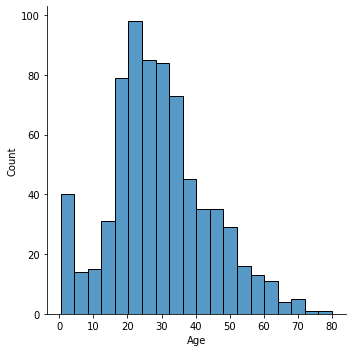

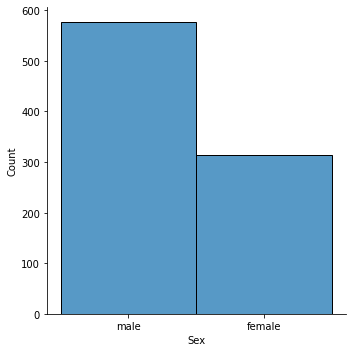

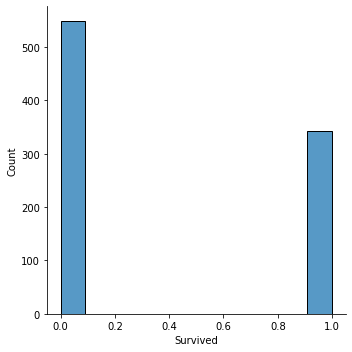

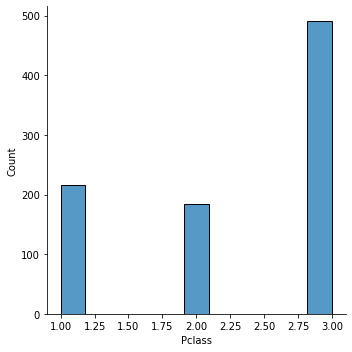

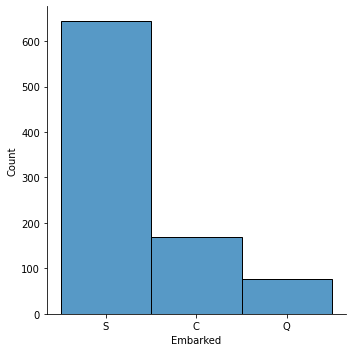

In [65]:
import seaborn as sns
#check distrs
sns.displot(train_data, x="Age")
sns.displot(train_data, x="Sex")
sns.displot(train_data, x="Survived")
sns.displot(train_data, x="Pclass")
sns.displot(train_data, x="Embarked")

<AxesSubplot:xlabel='Pclass'>

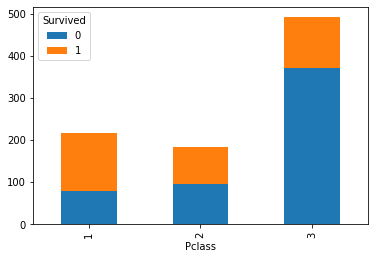

In [66]:
train_data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

In [67]:
#divide data to cat and num
df_num = train_data[['Age','SibSp','Parch','Fare']]
df_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

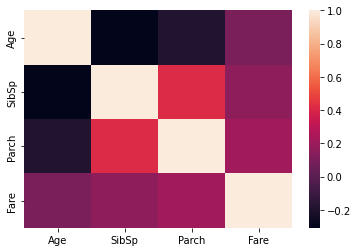

In [68]:
#data normalization ?
print(df_num.corr())
sns.heatmap(df_num.corr())

In [69]:
#compare Survival rate
pd.pivot_table(train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [70]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [71]:
#Pclass, Sex, Embarked per Survived
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'), end ='\n\n\n')
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'), end ='\n\n\n')
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [72]:
#hypotheses
#1. Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across 
#   multiple cabins (cabin_multiple) impacted survival)
#
#2. Tickets - Do different ticket types impact survival rates?
#
#3. Does a person's title relate to survival rates?

df_cat.Cabin
train_data['cabin_multiple'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_data['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [73]:
pd.pivot_table(train_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [74]:
#creates new cat. (from cabin)
train_data['cabin_adv'] = train_data.Cabin.apply(lambda x: str(x)[0])

In [75]:
#comparing surivial rate
print(train_data.cabin_adv.value_counts(), end='\n\n\n')
pd.pivot_table(train_data,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64




cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [76]:
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [77]:
train_data['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [78]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(train_data,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [79]:
#survival rate across different tyicket types 
pd.pivot_table(train_data,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [80]:
#feature engineering on person's title 
train_data.Name.head(50)
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [81]:
train_data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

## Data Preprocessing

In [83]:
#create all categorical variables for both training and test sets
all_data = pd.concat([train_data,test])

all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#USE ONLY IN COMPETITIONS

In [84]:
#NaN -> median
all_data.Age = all_data.Age.fillna(train_data.Age.median())
all_data.Fare = all_data.Fare.fillna(train_data.Fare.median())

In [85]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train_test       0
dtype: int64

In [86]:
#Nan for Embarked = 0 in test and 2 in train (cut out)
all_data.dropna(subset=['Embarked'],inplace = True)

<AxesSubplot:>

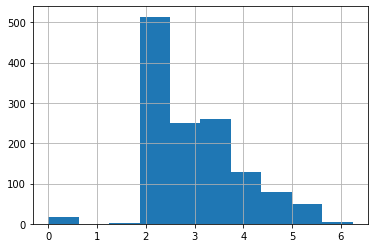

In [87]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [88]:
all_data.Pclass = all_data.Pclass.astype(str)
#one-hot
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

In [89]:
#back slpit
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

In [90]:
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

## Scale data

In [91]:
#may be tensorflow?
from sklearn.preprocessing import StandardScaler

In [92]:
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.580261,0.480272,-0.445407,-0.896331,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.662297,0.480272,-0.445407,1.347870,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.479537,-0.445407,-0.815013,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.429318,0.480272,-0.445407,1.048255,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.479537,-0.445407,-0.800632,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.114301,-0.479537,-0.445407,-0.800632,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,0.739957,-0.479537,-0.445407,1.781098,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0.701127,-0.479537,-0.445407,-0.896331,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,-0.114301,-0.479537,-0.445407,-0.800632,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [94]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)

X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
#Done

## Models

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [101]:
#1. Naive Bayes
model_n_b = GaussianNB()
cv = cross_val_score(model_n_b,X_train_scaled,y_train,cv=7)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.66141732 0.69291339 0.71653543 0.74015748 0.80314961 0.73228346
 0.75590551] 
Mean = 0.7289088863892014


In [108]:
#2. LogReg
model_l_r = LogisticRegression(penalty='l2' ,max_iter = 1000)

cv = cross_val_score(model_l_r,X_train_scaled,y_train,cv=7)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.79527559 0.82677165 0.8503937  0.79527559 0.84251969 0.8503937
 0.8503937 ] 
Mean = 0.830146231721035


In [109]:
#3. KNN
model_knn = KNeighborsClassifier(metric='minkowski')

cv = cross_val_score(model_knn,X_train_scaled,y_train,cv=7)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.77952756 0.81102362 0.81889764 0.79527559 0.85826772 0.80314961
 0.83464567] 
Mean = 0.814398200224972


In [111]:
#4. XGBForest
model_xgb = xgb.XGBRFClassifier(n_estimators = 200)

cv = cross_val_score(model_xgb,X_train_scaled,y_train,cv=7)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.80314961 0.81102362 0.8503937  0.84251969 0.8503937  0.80314961
 0.86614173] 
Mean = 0.8323959505061868


In [130]:
#5. SVC
model_svc = SVC(probability=True)

cv = cross_val_score(model_svc,X_train_scaled,y_train,cv=7)
print(f'CV = {cv} \nMean = {cv.mean()}')

CV = [0.81102362 0.83464567 0.85826772 0.81102362 0.83464567 0.78740157
 0.87401575] 
Mean = 0.830146231721035


In [131]:
# Main model
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators = [('lr',model_l_r),
                                            ('knn',model_knn),
                                            ('rf',model_xgb),
                                            ('gnb',model_n_b),
                                            ('svc',model_svc)], voting = 'soft')
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.80337079 0.8258427  0.80337079 0.84745763]
0.8178061321653018


In [133]:
voting_clf.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('knn', KNeighborsClassifier()),
                             ('rf',
                              XGBRFClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interact...
                                              max_delta_step=None,
                                              max_depth=None

In [135]:
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('/home/siarhei/Programming/ML/Data/base_submission', index=False)

## Improvement

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [137]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [138]:
#1.
lr = LogisticRegression()
param_grid = {'max_iter' : [1500],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 1500, 'penalty': 'l1', 'solver': 'liblinear'}


In [139]:
#2.
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8290611312131023
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [140]:
#3.
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
4.
xgbfc = xgb.XGBRFClassifier()

param_grid={'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5, 10]}

clf_xgbfc = GridSearchCV(xgbfc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgbfc = clf_xgbfc.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgbfc,'XGBFC')

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
XGBFC
Best Score: 0.8414143337776931
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.8}


<AxesSubplot:>

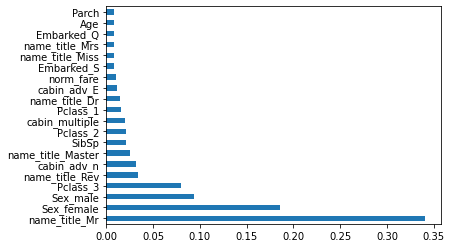

In [149]:
best_xgbfc = best_clf_xgbfc.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_xgbfc.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [153]:
y_hat_xgb = best_clf_xgbfc.best_estimator_.predict(X_test_scaled).astype(int)

xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}

submission_xgb = pd.DataFrame(data=xgb_submission)

submission_xgb.to_csv('/home/siarhei/Programming/ML/Data/xgbfc_submission.csv', index=False)

In [156]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_xgbfc = best_clf_xgbfc.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_xgbfc),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_xgbfc),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_xgbfc),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgbfc = VotingClassifier(estimators = [('knn',best_knn),('rf',best_xgbfc),('svc',best_svc),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgbfc,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.80337079 0.81460674 0.83146067 0.79775281 0.83615819]
voting_clf_hard mean : 0.8166698406652702
voting_clf_soft : [0.78651685 0.82022472 0.8258427  0.79213483 0.84745763]
voting_clf_soft mean : 0.815558941154066
voting_clf_all : [0.81460674 0.82022472 0.83146067 0.80337079 0.86440678]
voting_clf_all mean : 0.8256839966990415
voting_clf_xgb : [0.81460674 0.82022472 0.83146067 0.80337079 0.86440678]
voting_clf_xgb mean : 0.8256903446962485


## Predictions with best

In [159]:
#Make Predictions 
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgbfc.fit(X_train_scaled, y_train)

y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgbfc = voting_clf_xgbfc.predict(X_test_scaled).astype(int)

In [172]:
# TO DataFrame

final_data_1 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_1 = pd.DataFrame(data=final_data_1)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgbfc}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgbfc' : y_hat_vc_xgbfc}
comparison = pd.DataFrame(data=final_data_comp)

In [173]:
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_xgbfc else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [174]:
comparison.difference_hard_all.value_counts()

0    406
1     12
Name: difference_hard_all, dtype: int64

## End

In [176]:
submission_1.to_csv('/home/siarhei/Programming/ML/Data/submission_xgbfc.csv', index =False)
submission_2.to_csv('/home/siarhei/Programming/ML/Data/submission_vc_hard.csv',index=False)
submission_3.to_csv('/home/siarhei/Programming/ML/Data/submission_vc_soft.csv', index=False)
submission_4.to_csv('/home/siarhei/Programming/ML/Data/submission_vc_all.csv', index=False)